<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

# **CHECKPOINT 1**

</div>

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = '#FFFFFF'  # bluish dark grey
plt.rcParams['axes.facecolor'] = '#FFFFFF' # bluish dark grey
plt.rcParams['savefig.facecolor'] = '#FFFFFF'  # bluish dark grey

plt.rcParams['legend.borderaxespad'] = 0 # separacion de legend
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.axisbelow'] = True

plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.facecolor'] = '212946' # bluish dark grey

for param in ['axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = 'k'  # very light grey
plt.rcParams['legend.labelcolor'] = 'w' # bluish dark grey

plt.rcParams['text.color']='k'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Lazo de Tension sin Compenar**
</div>

In [5]:
LazeTensionSinCompensar = pd.read_csv("LTSpice/Lazo de Tensión/Lazo de Tension - Sin Compensar.txt", delimiter="\t")
LazeTensionSinCompensar.loc[LazeTensionSinCompensar['Freq'] > 1.8, 'Phase'] -= 360
LazeTensionSinCompensar['Phase'] += 360
LazeTensionSinCompensar.head(2)

,Freq,Gain,Phase
0,0.10,58.55,180.10
1,0.11,58.55,180.09


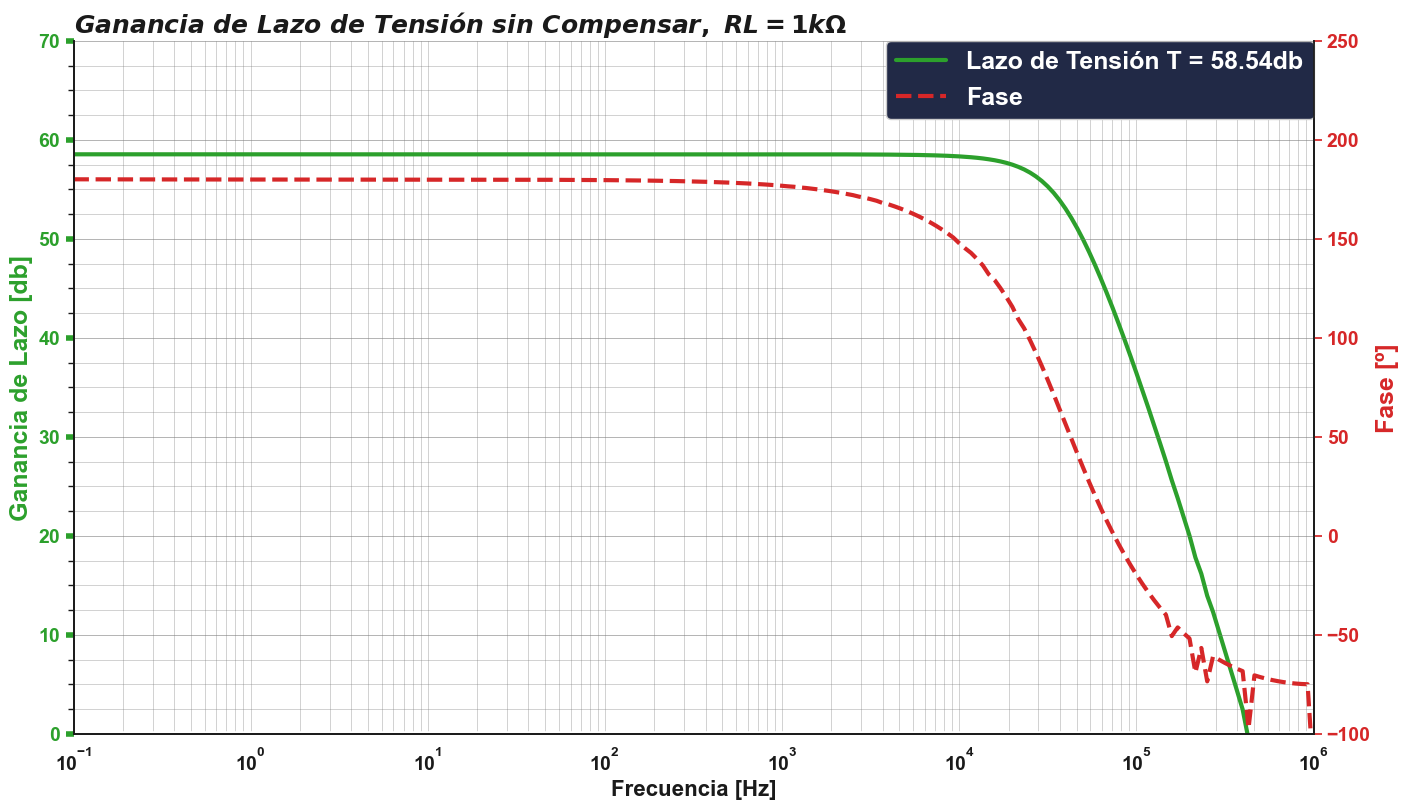

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0, 70, 29), minor=True)
ax1.set_ylim(0, 70)
ax1.set_ylabel("Ganancia de Lazo [db]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0.1, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Fase [º]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
#ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')
ax2.set_ylim(-100, 250)  # Ajustar la escala de corriente

# Configurar título y nombre del eje X
plt.title(r"$Ganancia\ de\ Lazo\ de\ Tensión\ sin\ Compensar,\ RL=1k\Omega$", fontsize=18, loc="left")  # Título centrado
ax1.set_xlabel("Frecuencia [Hz]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

# Graficar voltaje en el primer eje
line1, = ax1.plot(LazeTensionSinCompensar["Freq"], LazeTensionSinCompensar["Gain"], linestyle='-', linewidth=3, color="tab:green")

# Graficar corriente en el segundo eje
line2, = ax2.plot(LazeTensionSinCompensar["Freq"], LazeTensionSinCompensar["Phase"], linestyle='--', linewidth=3, color="tab:red")

# Mostrar leyenda
ax1.legend([line1,line2], ["Lazo de Tensión T = 58.54db","Fase"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-1,1e6)
plt.savefig("CP2_Lazo_Tension_Sin_Compensar.png", bbox_inches="tight")

plt.show()


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Lazo de Tension Compensado**
</div>

In [8]:
LazeTensionCompensado = pd.read_csv("LTSpice/Lazo de Tensión/Lazo de Tension - Compensado.txt", delimiter="\t")
cond = (LazeTensionCompensado['Freq'] > 1e5) & (LazeTensionCompensado['Phase'] > -50)
LazeTensionCompensado.loc[cond, 'Phase'] = -150
LazeTensionCompensado.head(2)

,Freq,Gain,Phase
0,0.10,58.54,179.31
1,0.11,58.54,179.24


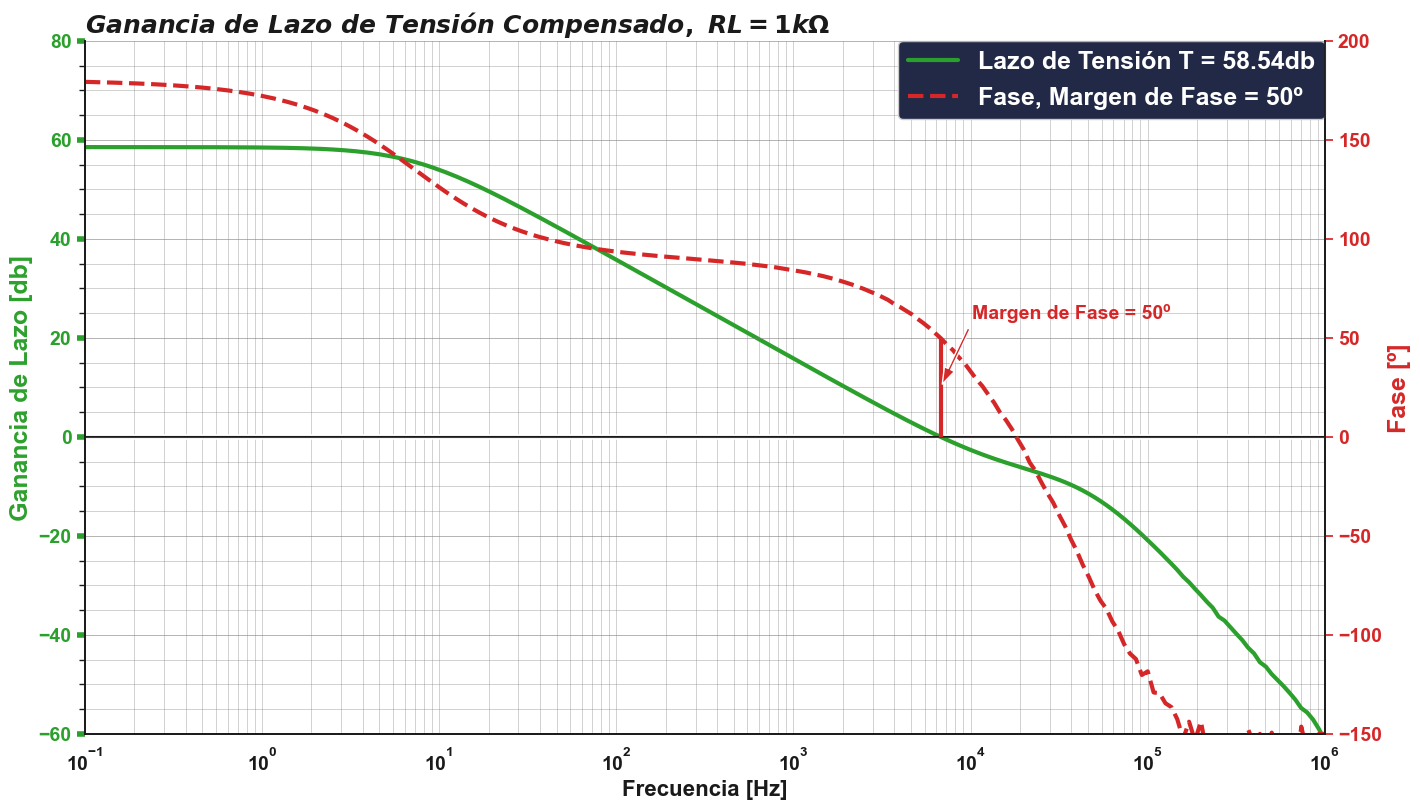

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(-60, 80, 29), minor=True)
ax1.set_ylim(-60, 80)
ax1.set_ylabel("Ganancia de Lazo [db]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0.1, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Fase [º]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
#ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')
ax2.set_ylim(-150, 200)  # Ajustar la escala de corriente

# Configurar título y nombre del eje X
plt.title(r"$Ganancia\ de\ Lazo\ de\ Tensión\ Compensado,\ RL=1k\Omega$", fontsize=18, loc="left")  # Título centrado
ax1.set_xlabel("Frecuencia [Hz]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="-", linewidth=0.5, alpha=0.5)

# Graficar voltaje en el primer eje
line1, = ax1.plot(LazeTensionCompensado["Freq"], LazeTensionCompensado["Gain"], linestyle='-', linewidth=3, color="tab:green")
ax1.axhline(y=0, color='k', linestyle='-')
# Graficar corriente en el segundo eje
line2, = ax2.plot(LazeTensionCompensado["Freq"], LazeTensionCompensado["Phase"], linestyle='--', linewidth=3, color="tab:red")
frecuencia_margen_fase = 6.78e3  # 10 kHz

# Dibujar la línea vertical desde 0 hasta 50 en el eje de fase
ax2.vlines(x=frecuencia_margen_fase, ymin=0, ymax=50, color='tab:red', linewidth=3, linestyles='-')

# Opcional: añadir una flechita o texto indicando la cota
ax2.annotate("Margen de Fase = 50º", 
             xy=(frecuencia_margen_fase, 25), 
             xytext=(frecuencia_margen_fase*1.5, 60),  # Ajustá el texto según lo que se vea mejor
             arrowprops=dict(facecolor='tab:red', shrink=0.05, width=2, headwidth=8),
             fontsize=14, color='tab:red', ha='left')


# Mostrar leyenda
ax1.legend([line1,line2], ["Lazo de Tensión T = 58.54db","Fase, Margen de Fase = 50º"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-1,1e6)
plt.savefig("CP2_Lazo_Tension_Compensado.png", bbox_inches="tight")

plt.show()


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Respuesta la cuadrada**
</div>

In [11]:
PulsoSubCompensado = pd.read_csv("LTSpice/Pulso/Pulso_Sub_Compensado.txt", delimiter="\t")
PulsoSubCompensado.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.00,-0.02


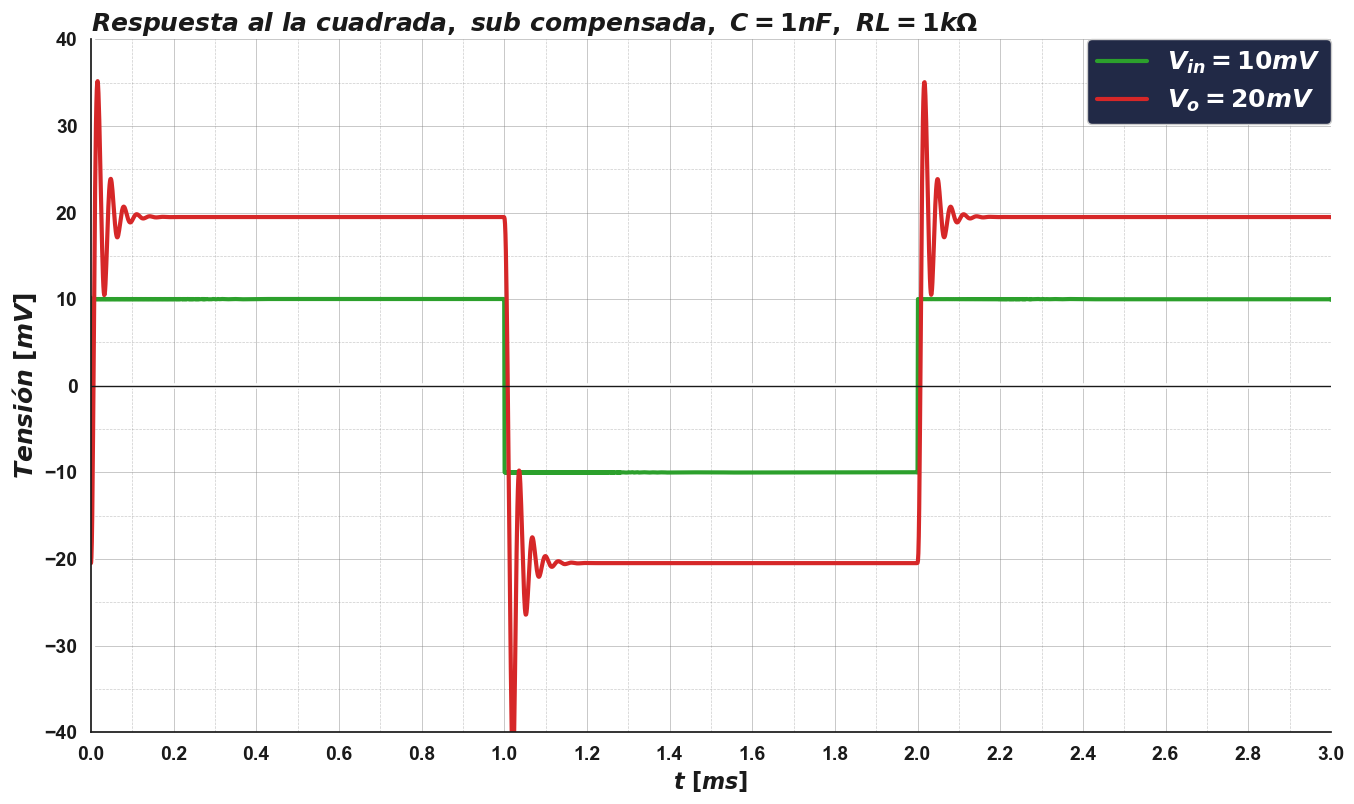

In [12]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

ax.set_xticks(np.linspace(0, 3, 31), minor=True)
ax.set_yticks(np.linspace(-40, 40, 17), minor=True)

ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(r"$Respuesta\ al\ la\ cuadrada,\ sub\ compensada,\ C=1nF,\ RL=1k\Omega$", fontsize=18, loc="left")  # Título centrado
ax.set_xlabel(r"$t\ [ms]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(0, 6, 0.2))
ax.set_yticks(np.arange(-50, 51, 10))

line1, = ax.plot(PulsoSubCompensado["Time"]*1000, PulsoSubCompensado["Vin"]*1000, linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(PulsoSubCompensado["Time"]*1000, PulsoSubCompensado["Vo"]*1000, linestyle='-', linewidth=3, color="tab:red")
ax.axhline(0, linestyle='-', linewidth=1, c='k')

# Mostrar leyenda
ax.legend([line1,line2], [r"$V_{in}=10mV$",r"$V_{o}=20mV$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 3)
plt.ylim(-40, 40)

plt.savefig("CP2_Pulso_Sub_Compensado.png", bbox_inches="tight")

plt.show()

In [13]:
PulsoCompensado = pd.read_csv("LTSpice/Pulso/Pulso_Compensado.txt", delimiter="\t")
PulsoCompensado.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.00,-0.02


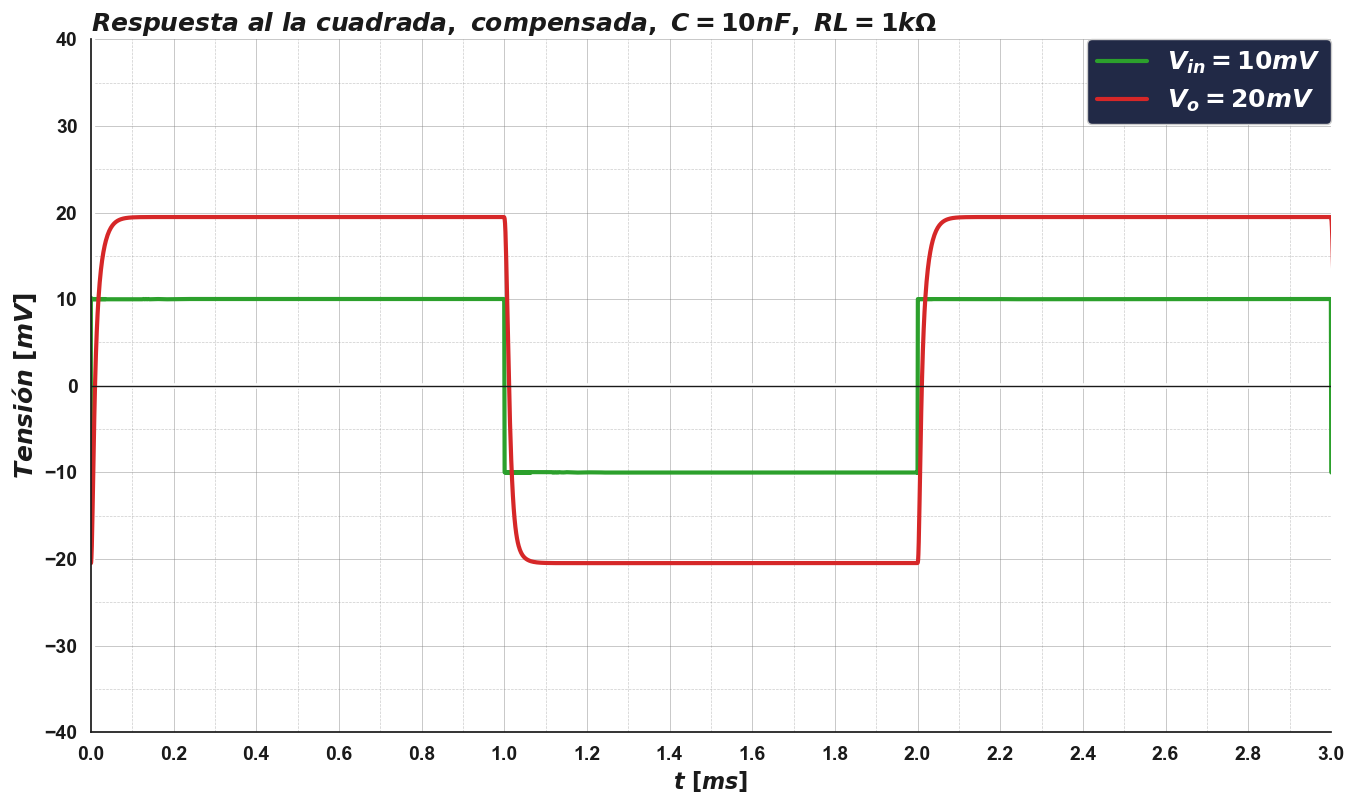

In [14]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

ax.set_xticks(np.linspace(0, 3, 31), minor=True)
ax.set_yticks(np.linspace(-40, 40, 17), minor=True)

ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(r"$Respuesta\ al\ la\ cuadrada,\ compensada,\ C=10nF,\ RL=1k\Omega$", fontsize=18, loc="left")  # Título centrado
ax.set_xlabel(r"$t\ [ms]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(0, 6, 0.2))
ax.set_yticks(np.arange(-50, 51, 10))


line1, = ax.plot(PulsoCompensado["Time"]*1000, PulsoCompensado["Vin"]*1000, linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(PulsoCompensado["Time"]*1000, PulsoCompensado["Vo"]*1000, linestyle='-', linewidth=3, color="tab:red")
ax.axhline(0, linestyle='-', linewidth=1, c='k')

# Mostrar leyenda
ax.legend([line1,line2], [r"$V_{in}=10mV$",r"$V_{o}=20mV$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 3)
plt.ylim(-40, 40)

plt.savefig("CP2_Pulso_Compensado.png", bbox_inches="tight")

plt.show()

In [15]:
PulsoSobreCompensado = pd.read_csv("LTSpice/Pulso/Pulso_Sobre_Compensado.txt", delimiter="\t")
PulsoSobreCompensado.head(2)

,Time,Vin,Vo
0,0.00,-0.01,-0.02
1,0.00,0.00,-0.02


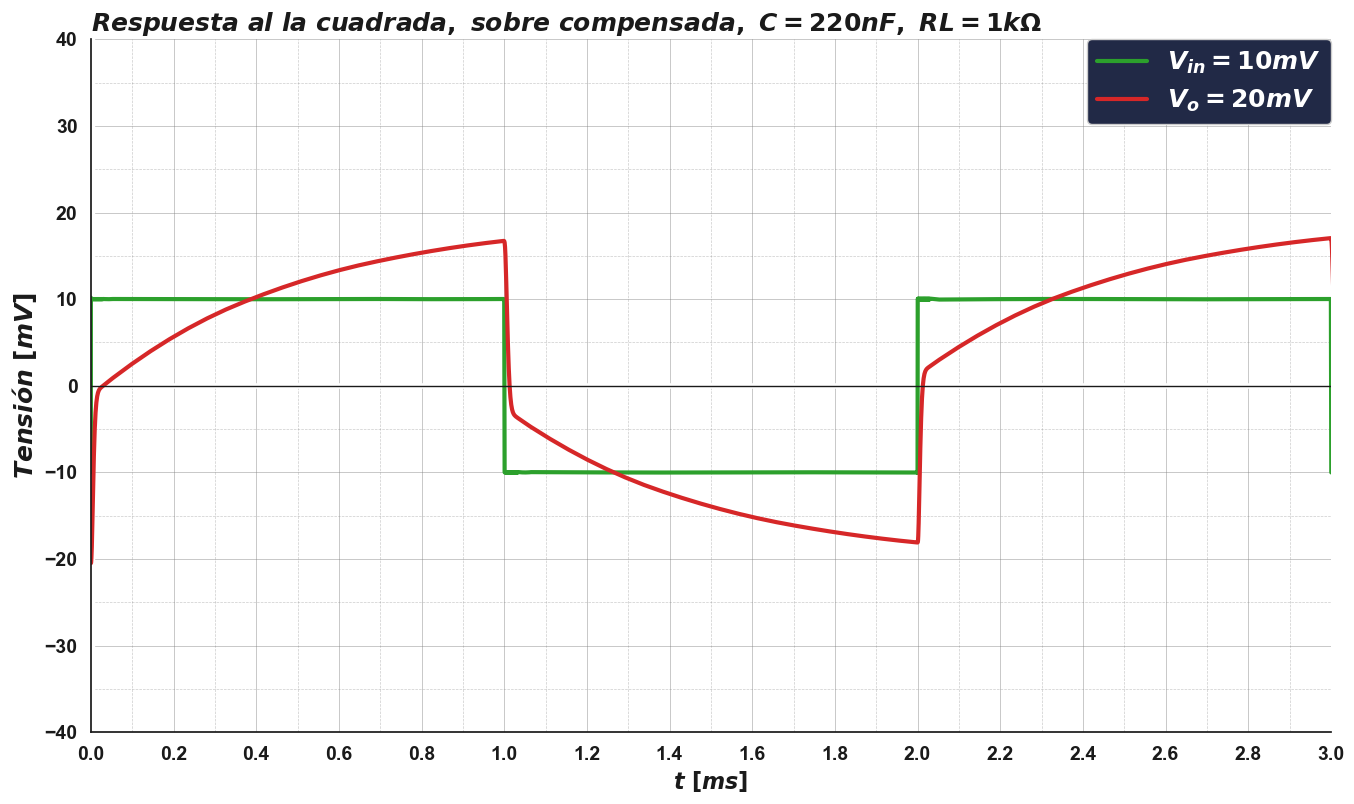

In [16]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

ax.set_xticks(np.linspace(0, 3, 31), minor=True)
ax.set_yticks(np.linspace(-40, 40, 17), minor=True)


ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Tensión\ [mV]$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(r"$Respuesta\ al\ la\ cuadrada,\ sobre\ compensada,\ C=220nF,\ RL=1k\Omega$", fontsize=18, loc="left")  # Título centrado
ax.set_xlabel(r"$t\ [ms]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(0, 3.1, 0.2))
#ax.set_yticks(np.arange(-50, 51, 10))


line1, = ax.plot(PulsoSobreCompensado["Time"]*1000, PulsoSobreCompensado["Vin"]*1000, linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(PulsoSobreCompensado["Time"]*1000, PulsoSobreCompensado["Vo"]*1000, linestyle='-', linewidth=3, color="tab:red")
ax.axhline(0, linestyle='-', linewidth=1, c='k')
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
# Mostrar leyenda
ax.legend([line1,line2], [r"$V_{in}=10mV$",r"$V_{o}=20mV$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(0, 3)
plt.ylim(-40, 40)

plt.savefig("CP2_Pulso_Sobre_Compensado.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Lazo de Corriente Sin Compensar**
</div>

In [21]:
LazeCorrienteSinCompensar = pd.read_csv("LTSpice/Lazo de Corriente/Ganancia de Lazo de Corriente Sin Compensar.txt", delimiter="\t")
LazeCorrienteSinCompensar.loc[LazeTensionSinCompensar['Freq'] > 5.01187233627272, 'Phase'] -= 360
LazeCorrienteSinCompensar['Phase'] += 360
LazeCorrienteSinCompensar.head(2)

,Freq,Gain,Phase
0,0.10,59.53,182.74
1,0.11,59.53,182.53


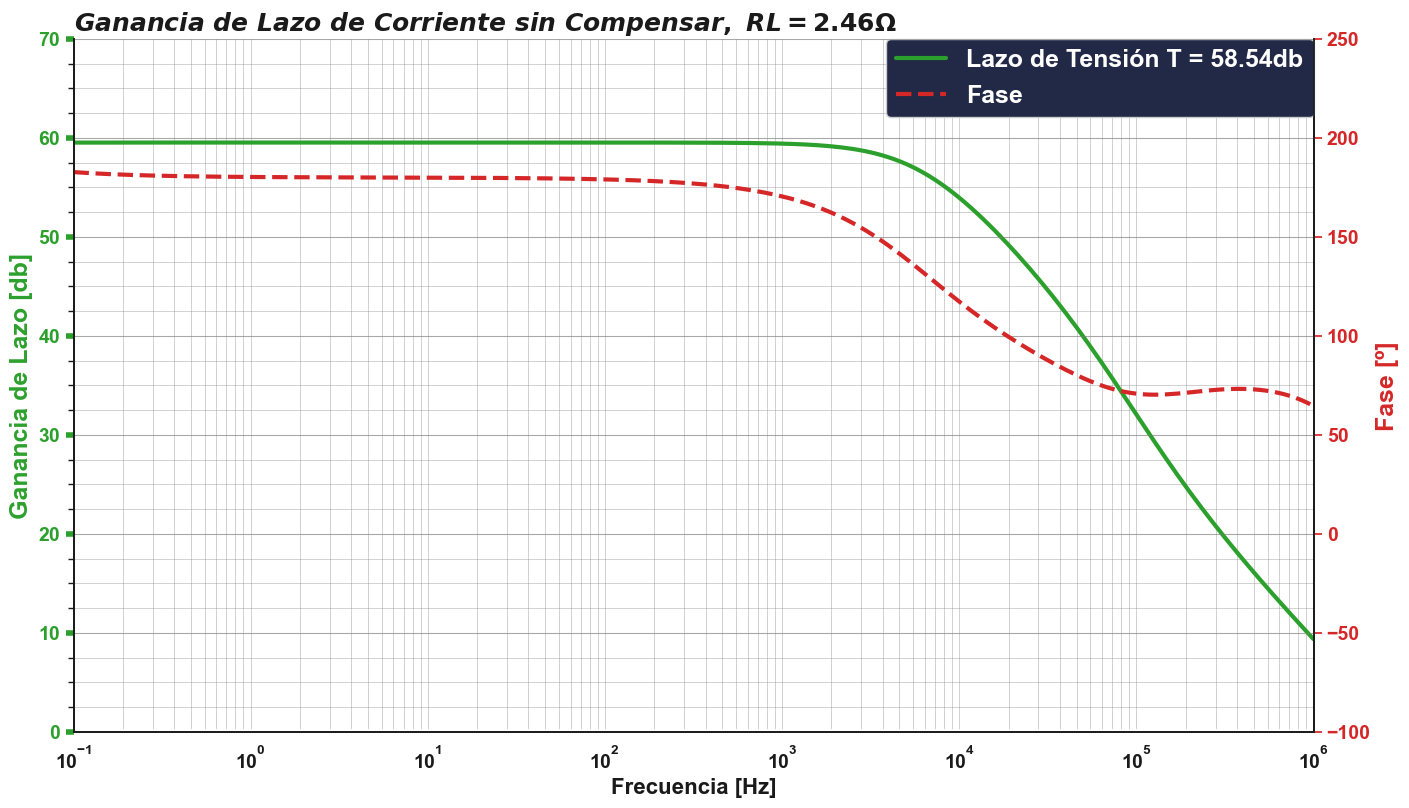

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0, 70, 29), minor=True)
ax1.set_ylim(0, 70)
ax1.set_ylabel("Ganancia de Lazo [db]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0.1, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Fase [º]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
#ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')
ax2.set_ylim(-100, 250)  # Ajustar la escala de corriente

# Configurar título y nombre del eje X
plt.title(r"$Ganancia\ de\ Lazo\ de\ Corriente\ sin\ Compensar,\ RL=2.46\Omega$", fontsize=18, loc="left")  # Título centrado
ax1.set_xlabel("Frecuencia [Hz]", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Graficar voltaje en el primer eje
line1, = ax1.plot(LazeCorrienteSinCompensar["Freq"], LazeCorrienteSinCompensar["Gain"], linestyle='-', linewidth=3, color="tab:green")

# Graficar corriente en el segundo eje
line2, = ax2.plot(LazeCorrienteSinCompensar["Freq"], LazeCorrienteSinCompensar["Phase"], linestyle='--', linewidth=3, color="tab:red")

# Mostrar leyenda
ax1.legend([line1,line2], ["Lazo de Tensión T = 58.54db","Fase"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-1,1e6)
plt.savefig("CP2_Lazo_Corriente_Sin_Compensar.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Lazo de Corriente Compensado**
</div>

In [24]:
LazeCorrienteCompensado = pd.read_csv("LTSpice/Lazo de Corriente/Ganancia de Lazo de Corriente Compensado.txt", delimiter="\t")
LazeCorrienteCompensado.loc[LazeCorrienteCompensado['Freq'] < 3.16227766016838e-1, 'Phase'] += 360
#LazeCorrienteCompensado['Phase'] += 360
LazeCorrienteCompensado.head(2)

,Freq,Gain,Phase
0,0.10,59.53,182.42
1,0.11,59.53,182.19


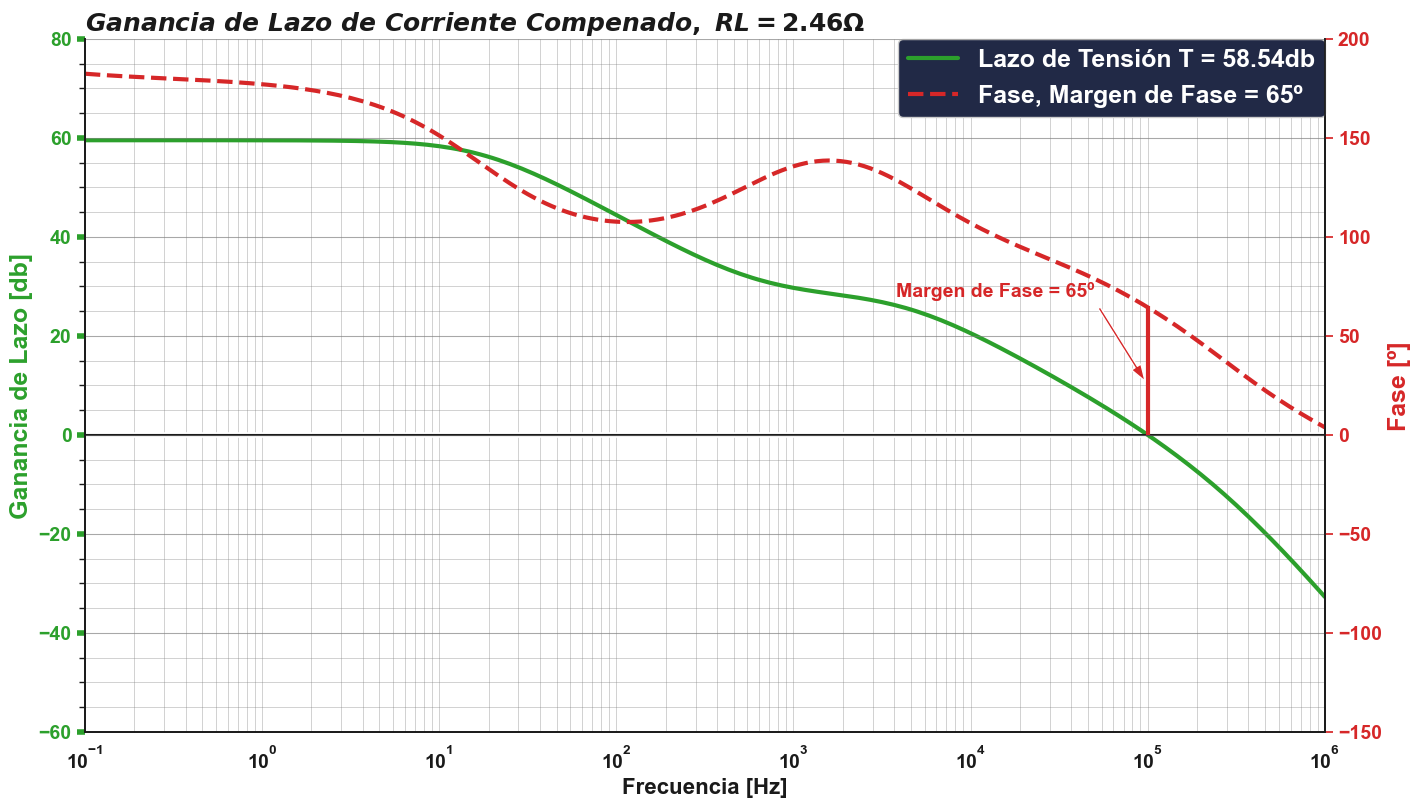

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(-60, 80, 29), minor=True)
ax1.set_ylim(-60, 80)
ax1.set_ylabel("Ganancia de Lazo [db]", fontsize=18, color="tab:green")
ax1.tick_params(axis='y', labelsize=14, colors='tab:green')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')

# Configurar los ticks del eje X
a = np.append(np.linspace(0.1, 1, 11), np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

# Crear un segundo eje Y para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Fase [º]", fontsize=18, color='tab:red')  # Etiqueta del eje Y de corriente
#ax2.set_yticks(np.linspace(0, 2, 25), minor=True)
ax2.tick_params(axis='y', labelsize=14, colors='tab:red')
ax2.set_ylim(-150, 200)  # Ajustar la escala de corriente

# Configurar título y nombre del eje X
plt.title(r"$Ganancia\ de\ Lazo\ de\ Corriente\ Compenado,\ RL=2.46\Omega$", fontsize=18, loc="left")  # Título centrado
ax1.set_xlabel("Frecuencia [Hz]", fontsize=16)  # Nombre del eje X

plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Graficar voltaje en el primer eje
line1, = ax1.plot(LazeCorrienteCompensado["Freq"], LazeCorrienteCompensado["Gain"], linestyle='-', linewidth=3, color="tab:green")
ax1.axhline(y=0, color='k', linestyle='-')
# Graficar corriente en el segundo eje
line2, = ax2.plot(LazeCorrienteCompensado["Freq"], LazeCorrienteCompensado["Phase"], linestyle='--', linewidth=3, color="tab:red")
frecuencia_margen_fase = 100e3  # 10 kHz

# Dibujar la línea vertical desde 0 hasta 65 en el eje de fase
ax2.vlines(x=frecuencia_margen_fase, ymin=0, ymax=65, color='tab:red', linewidth=3, linestyles='-')

# Añadir la flecha y el texto a la izquierda
ax2.annotate("Margen de Fase = 65º", 
             xy=(frecuencia_margen_fase, 25), 
             xytext=(frecuencia_margen_fase / 2, 70),  # Mover a la izquierda
             arrowprops=dict(facecolor='tab:red', shrink=0.05, width=2, headwidth=8),
             fontsize=14, color='tab:red', ha='right')  # ha='right' alinea el texto a la derecha del punto


# Mostrar leyenda
ax1.legend([line1,line2], ["Lazo de Tensión T = 58.54db","Fase, Margen de Fase = 65º"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-1,1e6)
plt.savefig("CP2_Lazo_Corriente_Compensado.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Potencia Disipada por el Transistor de Paso**
</div>

In [28]:
PotenciaTIP42C = pd.read_csv("LTSpice/Potencia Disipada/Potencia Disipada Transistor de Paso.txt", delimiter="\t")
PotenciaTIP42C.head(2)

,RL,TIP42C
0,0.00,3.66
1,0.00,3.66


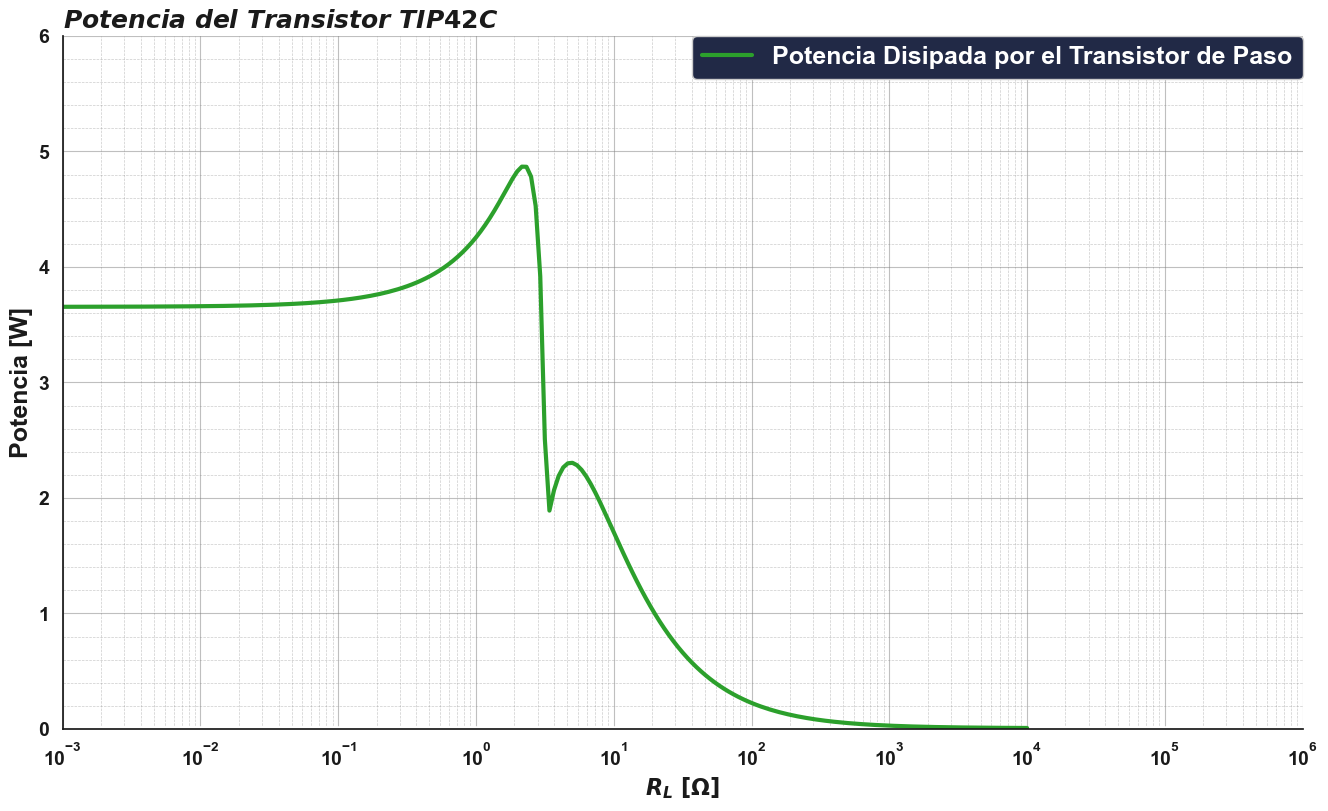

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))
ax1.set_xlabel(r"$R_L\ [\Omega]$", fontsize=16)  # Nombre del eje X

# Configurar los ticks y la escala del eje X
ax1.set_xscale('log')
ax1.tick_params(axis='both', width=4, labelsize=30)

# Configurar el eje Y de voltaje
ax1.set_yticks(np.linspace(0,6, 31), minor=True)
ax1.set_ylabel("Potencia [W]", fontsize=18, color="k")
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14)

ax1.axhline(0, linestyle='-', linewidth=4, c='white')
ax1.axvline(0, linestyle='solid', linewidth=6, c='white')
plt.title(r"$Potencia\ del\ Transistor\ TIP42C$", fontsize=18, loc="left")  # Título centrado

# Configurar los ticks del eje X
a = np.append(np.linspace(0.001, 0.01, 11), np.linspace(0.01, 0.1, 11))
a = np.append(a, np.linspace(0.1, 1, 11))
a = np.append(a, np.linspace(1, 10, 11))
a = np.append(a, np.linspace(10, 100, 11))
a = np.append(a, np.linspace(100, 1000, 11))
a = np.append(a, np.linspace(1000, 10000, 11))
a = np.append(a, np.linspace(10000, 100000, 11))
a = np.append(a, np.linspace(100000, 1000000, 11))
a = np.append(a, np.linspace(1000000, 10000000, 11))

ax1.set_xticks(a, minor=True)

# Configuración de la grilla
plt.grid(which='both', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
line1, = ax1.plot(PotenciaTIP42C["RL"], PotenciaTIP42C["TIP42C"], linestyle='-', linewidth=3, color="tab:green")
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.8, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)

# Mostrar leyenda
ax1.legend([line1], ["Potencia Disipada por el Transistor de Paso"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(1e-3,1e6)
ax1.set_ylim(0, 6)

plt.savefig("CP2_Potencia_TIP42C.png", bbox_inches="tight")

plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Sub Compensado**
    
</div>

In [35]:
tStartUpSub = pd.read_csv("LTSpice/tStartUp/tStartUpSubcompensado.txt", delimiter="\t")
tStartUpSub['time'] = tStartUpSub['time']- 1/1000 
tStartUpSub.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,-0.00,0.00,-0.00


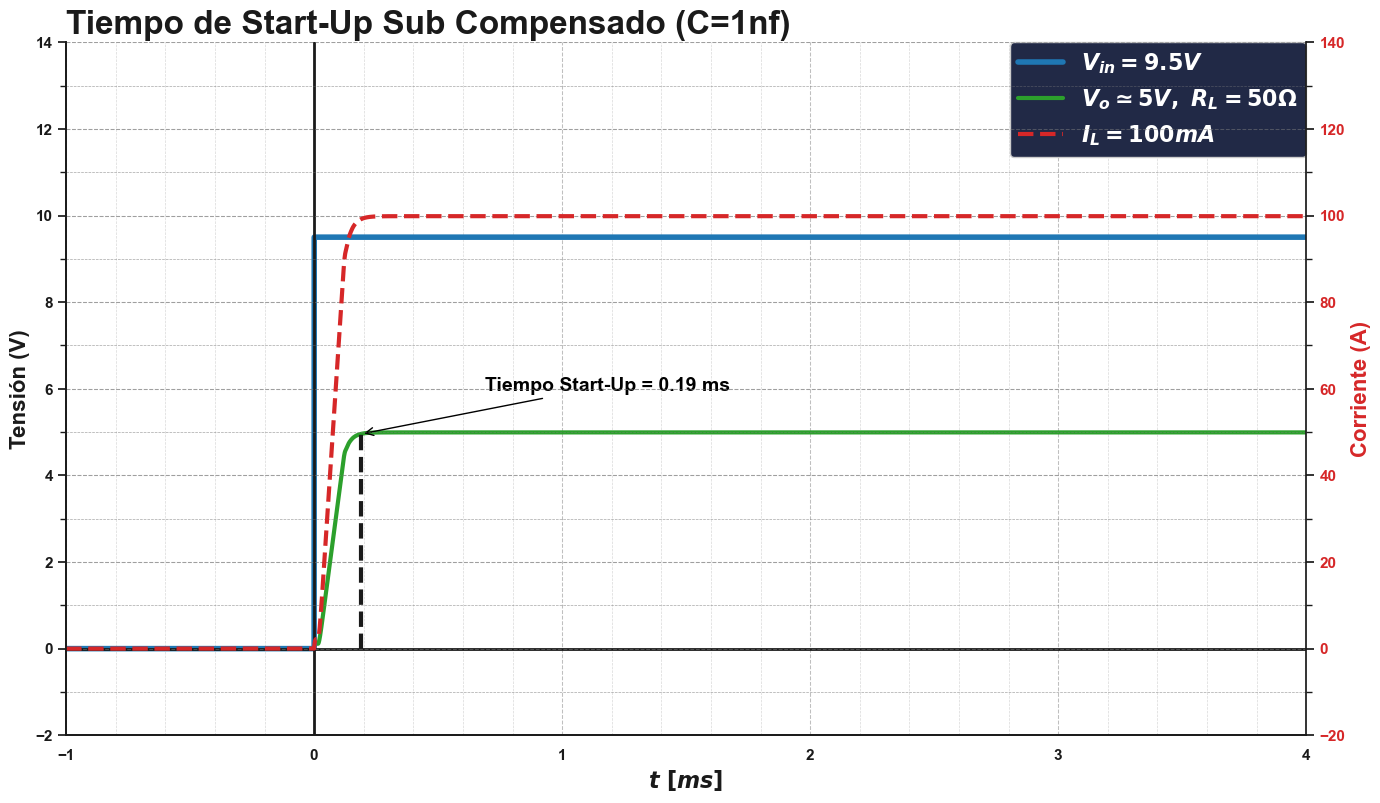

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUpSub["time"]*1000, tStartUpSub["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUpSub["time"]*1000, tStartUpSub["V(vregp)"], linewidth=4, color="tab:blue")

valor_final = tStartUpSub["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUpSub[tStartUpSub["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000 ),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 + 0.5, valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUpSub["time"]*1000, tStartUpSub["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Sub Compensado (C=1nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpSub.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Compensado**
    
</div>

In [45]:
tStartUp = pd.read_csv("LTSpice/tStartUp/tStartUpcompensado.txt", delimiter="\t")
tStartUp['time'] = tStartUp['time'] - 1/1000
tStartUp.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,-0.00,0.00,-0.00


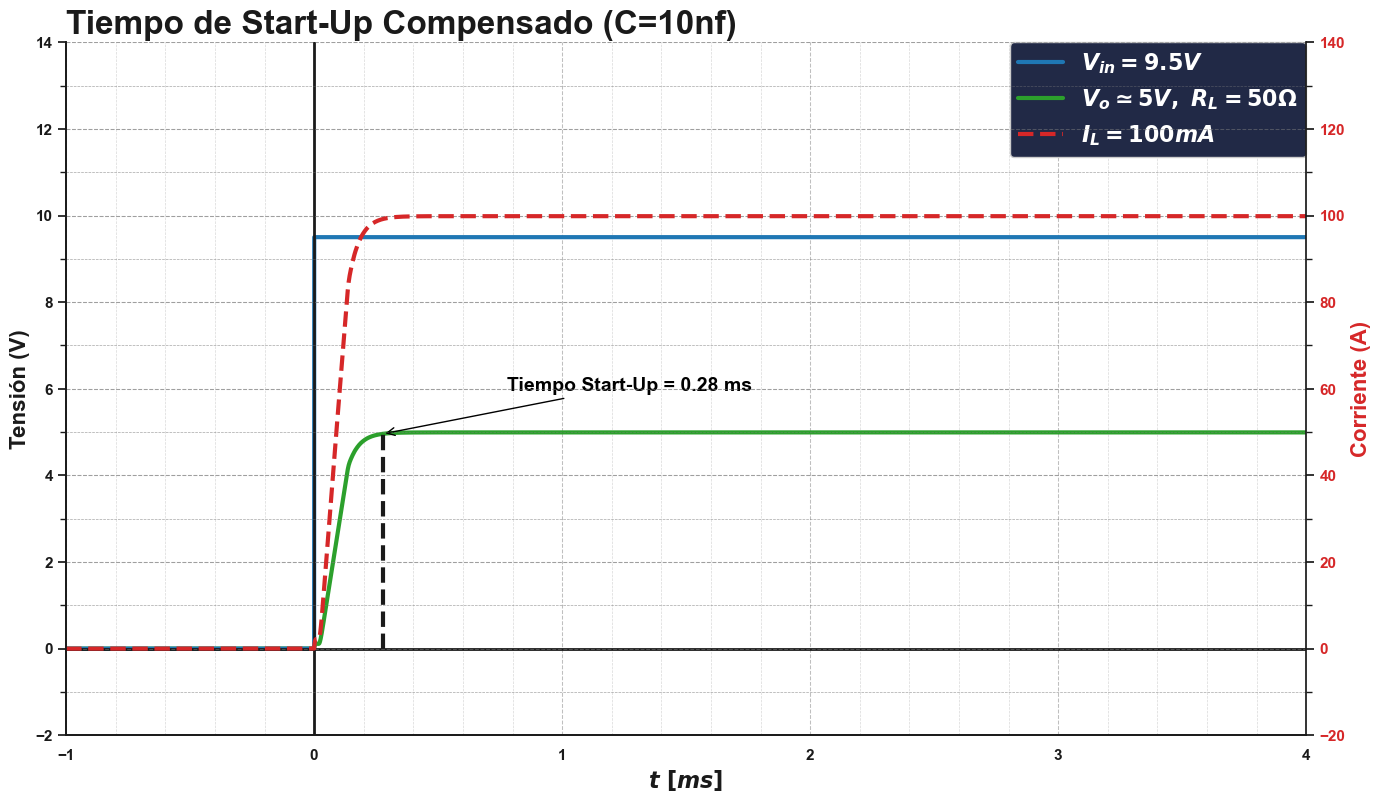

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUp["time"]*1000, tStartUp["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUp["time"]*1000, tStartUp["V(vregp)"], linewidth=3, color="tab:blue")

valor_final = tStartUp["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUp[tStartUp["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 + 0.5, valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUp["time"]*1000, tStartUp["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Compensado (C=10nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpComp.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Tiempo de StartUp Sobre Compensado**
    
</div>

In [48]:
tStartUpSobre = pd.read_csv("LTSpice/tStartUp/tStartUpSobrecompensado.txt", delimiter="\t")
tStartUpSobre['time'] = tStartUpSobre['time'] - 1/1000
tStartUpSobre.head(2)

,time,V(vo),V(vregp),I(Rl)
0,-0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00


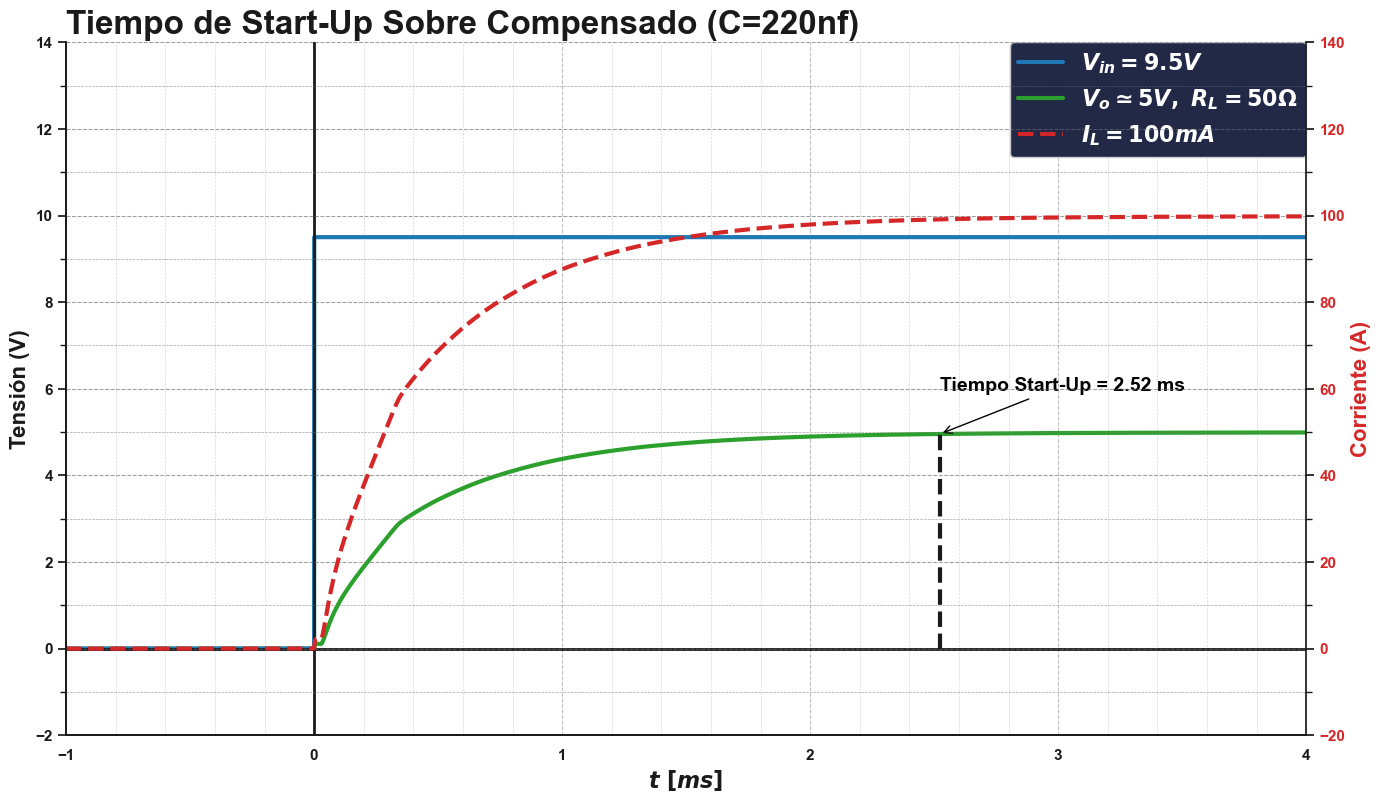

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Crear la figura
plt.figure(figsize=(16, 9))
ax1 = plt.gca()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_position(("outward", 0))
ax1.spines["bottom"].set_position(("outward", 0))

ax1.set_yticks(np.linspace(-2,14, 17), minor=True)

# Etiquetas de ejes
ax1.set_xlabel("$t\ [ms]$", fontsize=16)
ax1.set_ylabel("Tensión (V)", fontsize=16, color="k")

# Graficar tensión
line1, = ax1.plot(tStartUpSobre["time"]*1000, tStartUpSobre["V(vo)"], linewidth=3, color="tab:green")
line2, = ax1.plot(tStartUpSobre["time"]*1000, tStartUpSobre["V(vregp)"], linewidth=3, color="tab:blue")

valor_final = tStartUpSobre["V(vo)"].iloc[-1]
valor_99_3 = 0.993 * valor_final
instante_99_3 = tStartUpSobre[tStartUpSobre["V(vo)"] >= valor_99_3]["time"].iloc[0]

# Añadir anotación
ax1.vlines(x=instante_99_3*1000, ymin=0, ymax=valor_99_3, color='k', linewidth=3, linestyles='--')
ax1.annotate(
    r"Tiempo Start-Up = {:.2f} ms".format(instante_99_3*1000 ),
    xy=(instante_99_3 * 1000, valor_99_3),
    xytext=(instante_99_3 * 1000 , valor_99_3 + 1),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=14,
    color="black"
)

ax1.tick_params(axis="y", labelcolor="k")
ax1.set_ylim(-2, 14)
ax1.axhline(0, linestyle='-', linewidth=2, c='k')
ax1.axvline(0, linestyle='-', linewidth=2, c='k')

ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.2))  # o el paso que prefieras

# Asegurarte de que la grilla se aplique también a X menor
ax1.grid(which="major", axis="both", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
ax1.grid(which="minor", axis="both", color="grey", linestyle="--", linewidth=0.5, alpha=0.3)

# Crear un segundo eje para la corriente
ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)

ax2.set_ylabel("Corriente (A)", fontsize=16, color="tab:red")
line3, = ax2.plot(tStartUpSobre["time"]*1000, tStartUpSobre["I(Rl)"]*1000, linewidth=3, color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_yticks(np.linspace(-20,140, 17), minor=True)
ax2.set_ylim(-20, 140)

# Título y grillas
plt.title("Tiempo de Start-Up Sobre Compensado (C=220nf)", fontsize=24, loc="left")
plt.grid(which="major", color="grey", linestyle="--", linewidth=0.75, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_xlim(-1, 4)

# Combinar leyendas
ax1.legend([line2, line1,  line3], [r"$V_{in}=9.5V$", r"$V_{o}\simeq5V,\ R_L=50\Omega$",r"$I_{L}=100mA$"], loc="upper right", fontsize=16,framealpha=1)

# Guardar con bordes ajustados
plt.savefig("CP2_tStartUpSobreComp.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

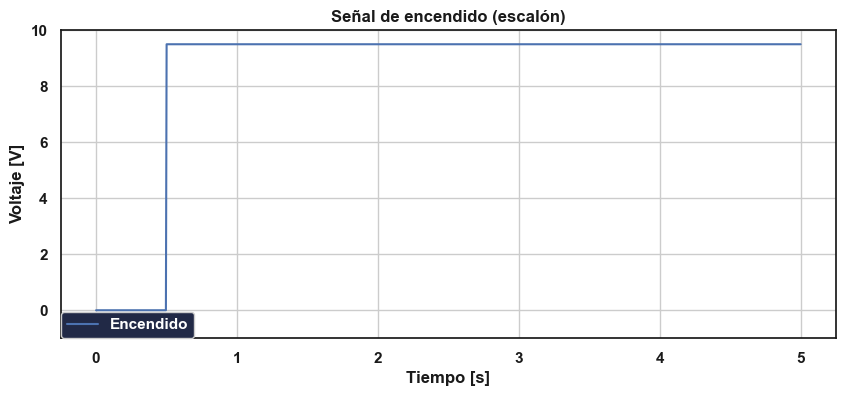

In [53]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)
V = 9.5 * (t >= 0.5)  # Escalón que se activa en t = 0.5 s

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Señal de encendido (escalón)")
plt.grid(True)
plt.legend()
plt.ylim(-1, 10)
plt.show()

In [54]:
V = 9.5 * ((t >= 0.5) & (t <= 2.5))  # Encendido entre 0.5s y 2.5s

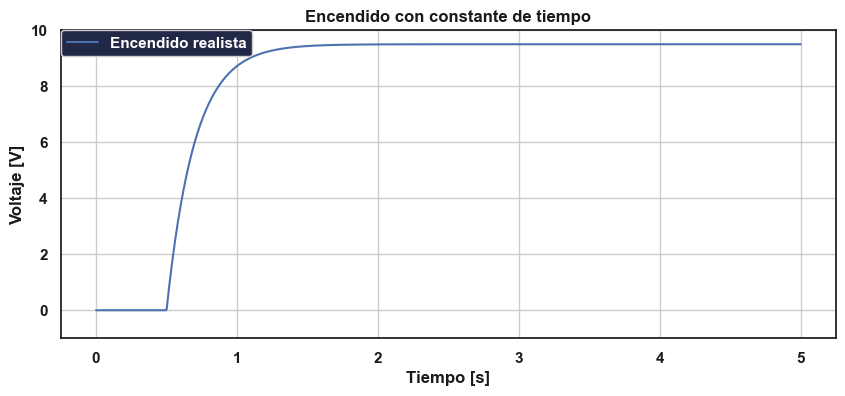

In [55]:
tau = 0.2  # constante de tiempo
V = 9.5 * (1 - np.exp(-(t - 0.5)/tau)) * (t >= 0.5)  # comienza en t = 0.5

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido realista")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido con constante de tiempo")
plt.grid(True)
plt.legend()
plt.ylim(-1, 10)
plt.show()

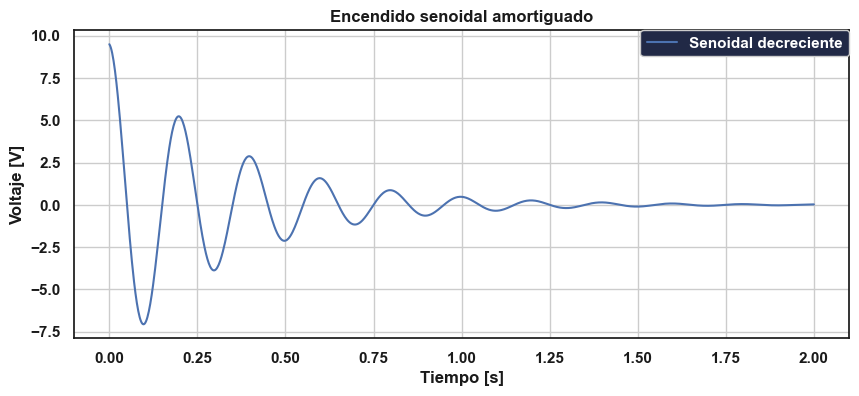

In [58]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 1000)
A = 9.5
alpha = 3       # cuánto decae
f = 5           # frecuencia (Hz)
phi = 0         # fase inicial

V = A * np.exp(-alpha * t) * np.cos(2 * np.pi * f * t + phi)

plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Senoidal decreciente")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado")
plt.grid(True)
plt.legend()
plt.show()


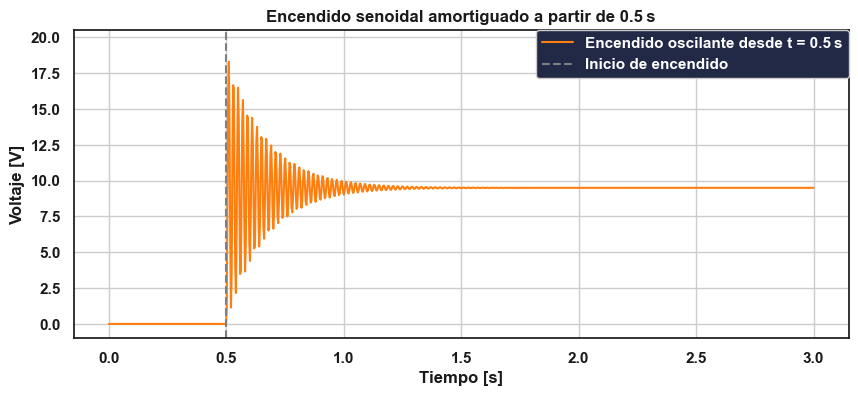

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo
t = np.linspace(0, 3, 1000)

# Parámetros de la señal
V_inicio = 0
V_final = 9.5
alpha = 6      # Amortiguamiento
f = 50          # Frecuencia (Hz)
t0 = 0.5       # Momento de encendido

# Parte oscilante: inicia en 0 a t0 y luego sube hacia 9.5 con oscilaciones amortiguadas
V_amort = V_final * (1 - np.exp(-alpha * (t - t0)) * np.cos(2 * np.pi * f * (t - t0)))

# Señal final: 0 antes de t0, luego V_amort
V = np.where(t < t0, 0, V_amort)

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido oscilante desde t = 0.5 s", color='tab:orange')
plt.axvline(t0, linestyle='--', color='gray', label="Inicio de encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado a partir de 0.5 s")
plt.grid(True)
plt.legend()
plt.ylim(-1, 20.5)
plt.show()



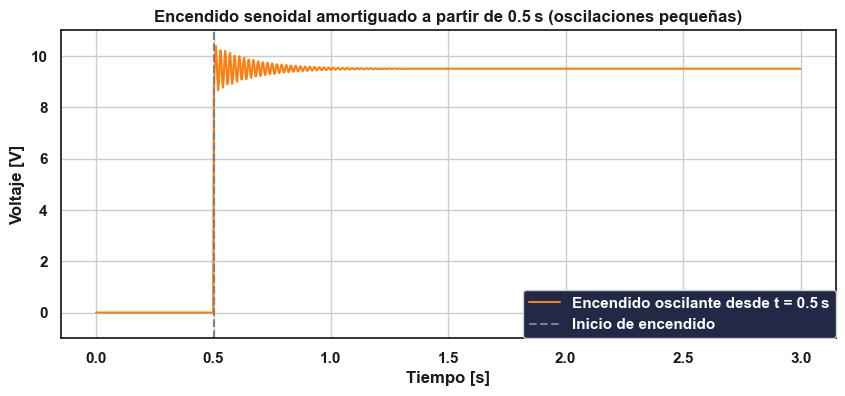

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo
t = np.linspace(0, 3, 1000)

# Parámetros de la señal
V_inicio = 0
V_final = 9.5
alpha = 6      # Amortiguamiento
f = 50         # Frecuencia (Hz)
t0 = 0.5       # Momento de encendido
A = 0.1        # Amplitud relativa de oscilación (10%)

# Parte oscilante desde t0 en adelante
V_amort = V_final * (1 - A * np.exp(-alpha * (t - t0)) * np.cos(2 * np.pi * f * (t - t0)))

# Señal final
V = np.where(t < t0, 0, V_amort)

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(t, V, label="Encendido oscilante desde t = 0.5 s", color='tab:orange')
plt.axvline(t0, linestyle='--', color='gray', label="Inicio de encendido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.title("Encendido senoidal amortiguado a partir de 0.5 s (oscilaciones pequeñas)")
plt.grid(True)
plt.legend()
plt.ylim(-1, 11)
plt.show()


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

### **Rendimiento**
    
</div>

In [88]:
rendimiento5 = pd.read_csv("LTSpice/Rendimiento/Rendimiento5.txt", delimiter="\t")
rendimiento5.head(2)

,Vin,Rendimiento
0,9.30,53.15
1,9.30,53.14


In [90]:
rendimiento500 = pd.read_csv("LTSpice/Rendimiento/Rendimiento500.txt", delimiter="\t")
rendimiento500.head(2)

,Vin,Rendimiento
0,9.30,26.09
1,9.30,26.09


In [92]:
rendimiento1k = pd.read_csv("LTSpice/Rendimiento/Rendimiento1k.txt", delimiter="\t")
rendimiento1k.head(2)

,Vin,Rendimiento
0,9.30,17.23
1,9.30,17.22


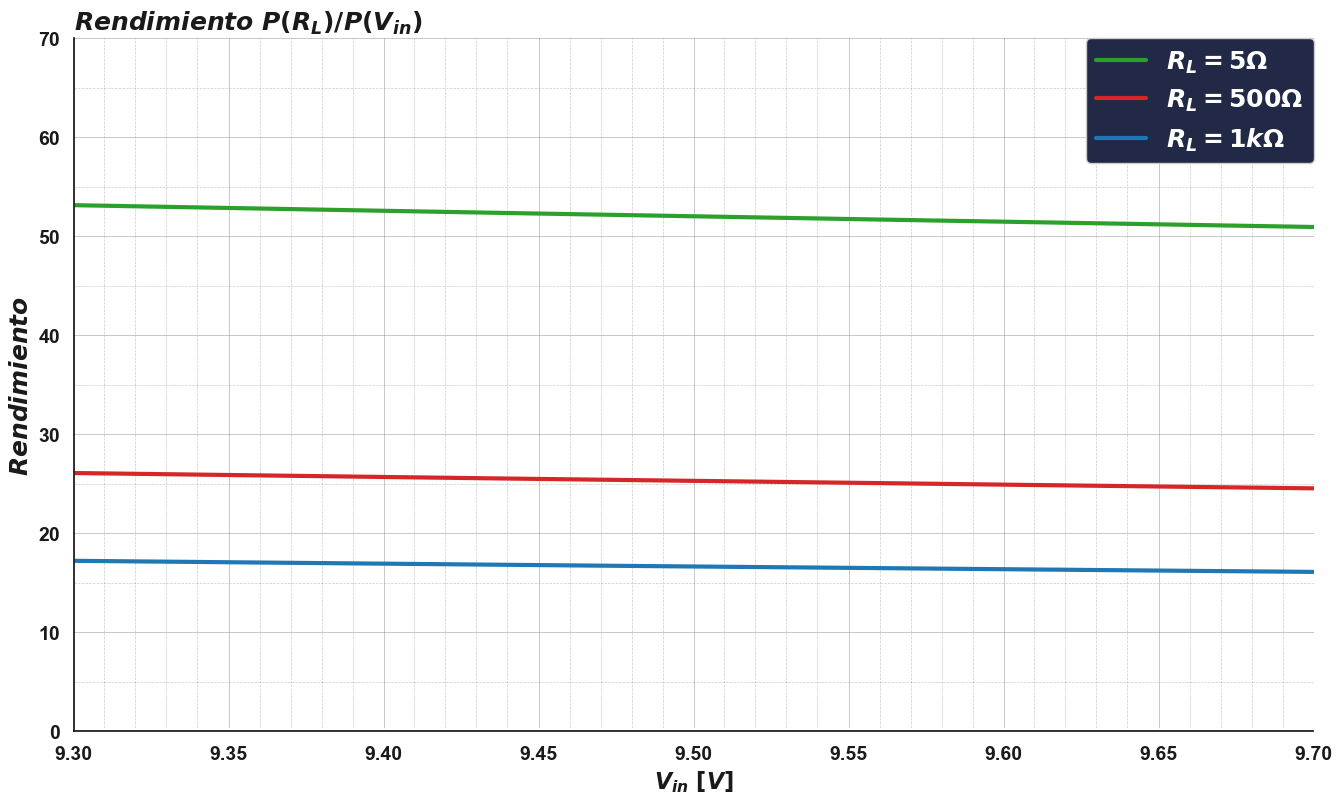

In [155]:
# Crear la figura y el eje principal
fig = plt.figure(figsize=[16, 9])
ax = fig.add_subplot(1, 1, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("outward", 0))

# Configurar los ticks y la escala del eje X
ax.tick_params(axis='both', width=4, labelsize=30)

ax.set_xticks(np.linspace(9.3, 9.7, 41), minor=True)
ax.set_yticks(np.linspace(0, 70, 15), minor=True)

ax.set_ylim(-50e-3, 50e-3)
ax.set_ylabel(r"$Rendimiento$", fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.axhline(0, linestyle='-', linewidth=4, c='white')
ax.axvline(0, linestyle='solid', linewidth=6, c='white')


# Configurar título y nombre del eje X
plt.title(r"$Rendimiento\ $"  r"$P(R_L)/P(V_{in})$", 
          fontsize=18, loc="left")
ax.set_xlabel(r"$V_{in}\ [V]$", fontsize=16)  # Nombre del eje X

# Configurar la grilla
plt.grid(which="major", color="grey", linestyle="-", linewidth=0.6, alpha=0.5)
plt.grid(which="minor", color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(np.arange(9.3, 9.8, 0.05))
#ax.set_yticks(np.arange(-50, 51, 10))

line1, = ax.plot(rendimiento5["Vin"], rendimiento5["Rendimiento"], linestyle='-', linewidth=3, color="tab:green")
line2, = ax.plot(rendimiento500["Vin"], rendimiento500["Rendimiento"], linestyle='-', linewidth=3, color="tab:red")
line3, = ax.plot(rendimiento1k["Vin"], rendimiento1k["Rendimiento"], linestyle='-', linewidth=3, color="tab:blue")

ax.axhline(0, linestyle='-', linewidth=1, c='k')

# Mostrar leyenda
ax.legend([line1,line2,line3], [r"$R_{L}=5\Omega$",r"$R_{L}=500\Omega$",r"$R_{L}=1k\Omega$"], loc="upper right", fontsize=18)

# Configurar el límite de X para invertirlo (de 1000 a 0)
plt.xlim(9.3, 9.7)
plt.ylim(0, 70)

plt.savefig("CP2_Rendimiento.png", bbox_inches="tight")

plt.show()